Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 5** | **Line and Circle Detection**
**Name** | Dejoras, Dylan James N.
**Section** | CPE32S3
**Date Performed**: | 02/21/2025
**Date Submitted**: | 02/21/2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


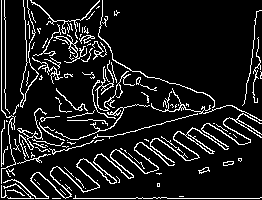

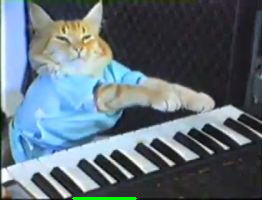

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/3rd year - 2nd sem/datasets/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

**Answers:**

1. minLineLength = 20 is the line of code that is responsible for setting the minimum line length
2. The formula for Hough transform is ρ = x * cos(θ) + y * sin(θ) where ρ (rho) is the distance from the origin to the line.
θ (theta) is the angle between the x-axis and the line.
(x, y) are the coordinates of a point on the line.  It uses rho and theta to first detect points in the Hough space. The space in between the points is then used by an algorithm to extract the lines as it finds peaks in the Hough space. For our code sample, we use the function HoughLinesP to make it easier.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

*The cv2.HoughCircles() function takes the input image, the detection method, and several parameters that control the sensitivity and accuracy of the circle detection process. These parameters include the accumulator resolution, minimum distance between circles, Canny edge thresholds, and the minimum and maximum radius of the circles.*

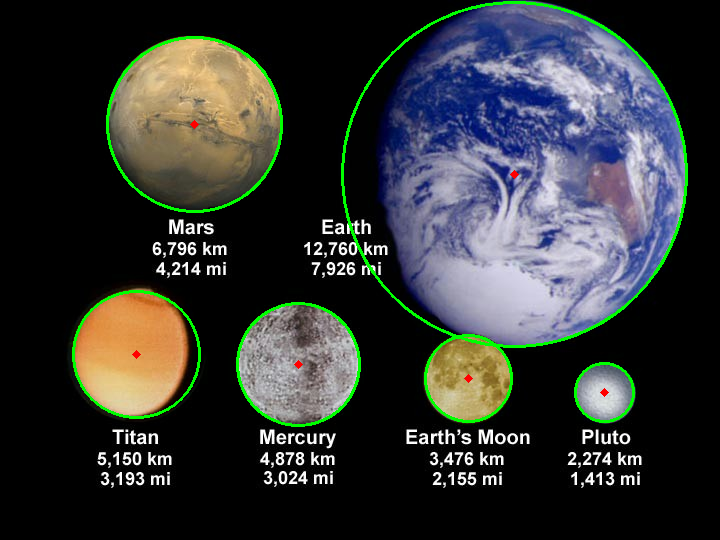

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/drive/MyDrive/3rd year - 2nd sem/datasets/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

*The circles are not detected properly when the N value is 5. Apparently n controls the intensity of the median blur applied to the image.*

Change the value to 9, **what happens to the image**?

*The detection for circles improved yet there is still inaccuracy as there are still random circles on the image.*

Lastly, change the value to 15, **what can you say about the resulting image?**

*After using 15 as the value of n, the circles effectively detected the planets in the image. Attempting to increase the value beyond 15 would only produce the same result. We could assume that 15 is the best value.*

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

The n value adjusts the intensity of the median blur applied to the image. It implies that a larger n will result to more blurring yet removing more noise but also blurring edges and details. Proper adjustment of the n value is crucial for circle detection but one must be wary of the trade-off for blurness.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

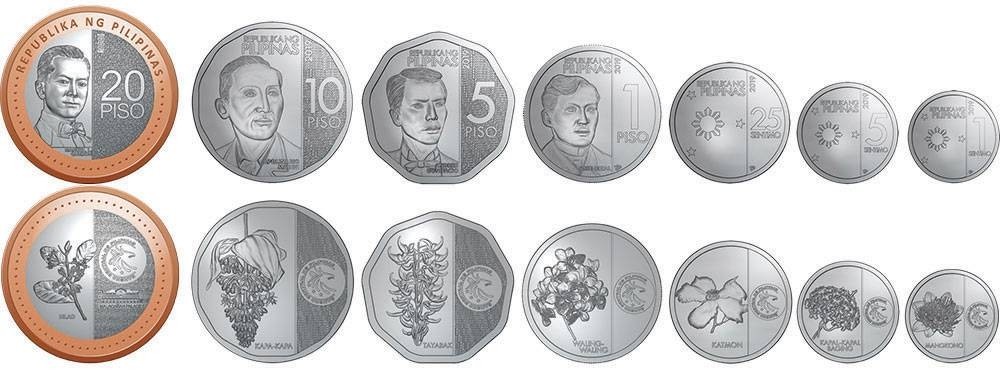

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

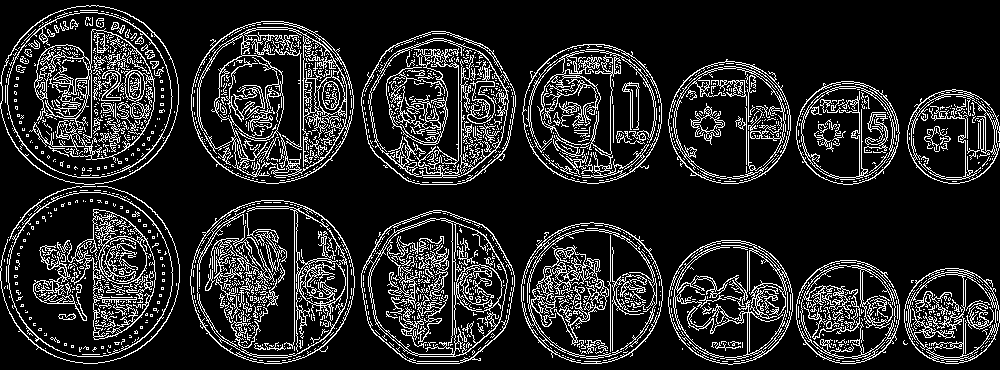

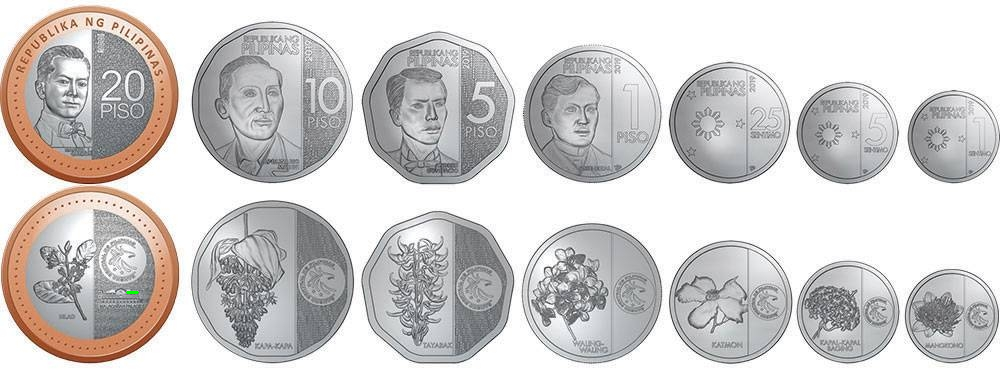

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

*The function for line detection detects the lines for each coin yet does not have a proper display for detecting the number of coins in the image. In other words, the usage of Hough lines for this image is not effective.*

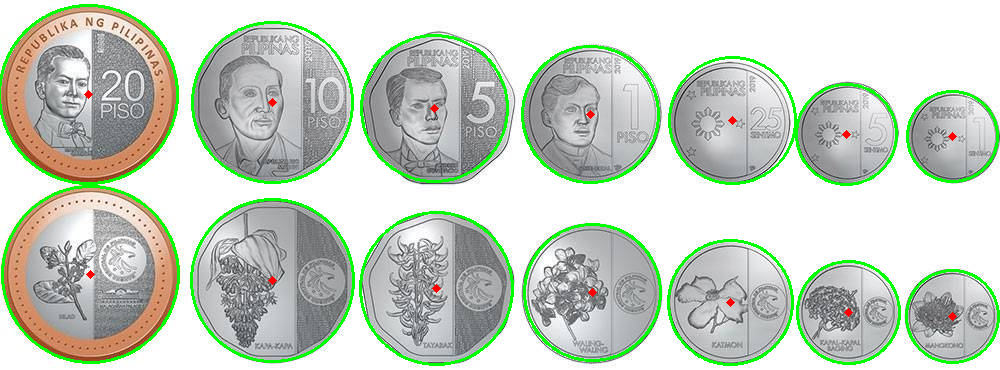

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 25

coins = cv2.imread('/content/coins.jpg')
gray_img = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,90,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(coins,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(coins,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("coins_circles.jpg", coins)
cv2_imshow(coins)

The function for circle detection effectively detects the number of coins in the image. Proper tuning of the parameters, as well as the intensity of the median blur, are important to successfully identify the number of circles in the image.

## 5. Summary, Conclusions and Lessons Learned

This activity highlighted the significance of line and circle detection in computer vision. By identifying lines and circular shapes, these techniques enable the recognition of specific objects and facilitate shape analysis within images. The extracted features serve as valuable descriptors for objects and scenes, contributing to a deeper understanding of image content. Overall, line and circle detection are essential tools for extracting meaningful information from images, laying a foundation for diverse computer vision applications.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*